<a href="https://colab.research.google.com/github/agamduggal/DataScienceAppl_NLP/blob/main/NLP_in_Python_3_Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis

## Introduction

After the data cleaning step where we put our data into a few standard formats, the next step is to take a look at the data and see if what we're looking at makes sense. Before applying any fancy algorithms, it's always important to explore the data first.

When working with numerical data, some of the exploratory data analysis (EDA) techniques we can use include finding the average of the data set, the distribution of the data, the most common values, etc. The idea is the same when working with text data. We are going to find some more obvious patterns with EDA before identifying the hidden patterns with machines learning (ML) techniques. We are going to look at the following for each comedian:

1. **Most common words** - find these and create word clouds
2. **Size of vocabulary** - look number of unique words and also how quickly someone speaks
3. **Amount of profanity** - most common terms

## Most Common Words

### Analysis

In [1]:
# Read in the document-term matrix
import pandas as pd

data = pd.read_pickle('dtm.pkl')
data = data.transpose()
data.head()

,anthony,asir,berner,cole,devito,ellen,fortune,hasan,jamie,jeff,jim,kerman,nate,paul,rogan,ronny,seth,tim,tom
aback,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
ability,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0
able,1,6,1,0,0,2,1,1,1,0,3,0,0,1,0,1,0,2,1
able make,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
abortion,0,0,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [2]:
# Find the top 30 words said by each comedian
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

top_dict # Displays {comedian1: [(word1, count1), (word2, count2), ...], comedian2: [(word1, count1), (word2, count2), ...], ...}

{'anthony': [('joke', 24),
  ('mike', 14),
  ('trans', 14),
  ('tyson', 11),
  ('mike tyson', 11),
  ('jokes', 11),
  ('fuck', 10),
  ('shit', 10),
  ('couple', 10),
  ('months', 9),
  ('fucking', 8),
  ('milwaukee', 8),
  ('pregnant', 7),
  ('standup', 6),
  ('standup comedy', 6),
  ('finally', 6),
  ('parents', 6),
  ('hate', 6),
  ('cancel', 6),
  ('gotten', 6),
  ('culture', 6),
  ('comedy', 6),
  ('sex', 6),
  ('dog', 6),
  ('porn', 6),
  ('country', 5),
  ('asked', 5),
  ('roast', 5),
  ('tonight', 5),
  ('trans people', 5)],
 'asir': [('country', 26),
  ('school', 23),
  ('sort', 20),
  ('fucking', 17),
  ('children', 17),
  ('place', 14),
  ('london', 14),
  ('basically', 14),
  ('entirely', 13),
  ('british', 13),
  ('probably', 13),
  ('bit', 13),
  ('prime', 12),
  ('mr', 12),
  ('imagine', 12),
  ('obviously', 12),
  ('course', 11),
  ('martin', 11),
  ('indian', 11),
  ('married', 11),
  ('boy', 11),
  ('just like', 10),
  ('youd', 10),
  ('quite', 10),
  ('loved', 10),
  

In [3]:
# Print the top 15 words said by each comedian
for comedian, top_words in top_dict.items():
    print(comedian)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('---')

anthony
joke, mike, trans, tyson, mike tyson, jokes, fuck, shit, couple, months, fucking, milwaukee, pregnant, standup
---
asir
country, school, sort, fucking, children, place, london, basically, entirely, british, probably, bit, prime, mr
---
berner
youre like, hes like, men, fucking, girls, sex, shes like, wanna, fuck, gun, like youre, dick, girl, fault
---
cole
shit, ngga, motherfucker, aint, fuck, black, dick, em, fucking, yall, men, rub, nggas, everybody
---
devito
mouth, dating, dentist, single, age, youve got, teeth, guard, father, car, sides, younger, hair, mother
---
ellen
ellen, business, um, car, pigeon, golden, gay, life like, people think, thinking, thank thank, started, degeneres, boss
---
fortune
mom, car, biscuits, wanna, cemetery, oh god, driving, looking, ghosts, gay, hours, truck, playing, train
---
hasan
fucking, fuck, shit, boundaries, door, mom, white, dog, just like, parents, wanna, hes like, remember, america
---
jamie
shit, ngga, fuck, black, white, clone, stay

**NOTE:** At this point, we could go on and create word clouds. However, by looking at these top words, you can see that some of them have very little meaning and could be added to a stop words list, so let's do just that.



In [4]:
# Look at the most common top words --> add them to the stop word list
from collections import Counter

# Let's first pull out the top 30 words for each comedian
words = []
for comedian in data.columns:
    top = [word for (word, count) in top_dict[comedian]]
    for t in top:
        words.append(t)

words

['joke',
 'mike',
 'trans',
 'tyson',
 'mike tyson',
 'jokes',
 'fuck',
 'shit',
 'couple',
 'months',
 'fucking',
 'milwaukee',
 'pregnant',
 'standup',
 'standup comedy',
 'finally',
 'parents',
 'hate',
 'cancel',
 'gotten',
 'culture',
 'comedy',
 'sex',
 'dog',
 'porn',
 'country',
 'asked',
 'roast',
 'tonight',
 'trans people',
 'country',
 'school',
 'sort',
 'fucking',
 'children',
 'place',
 'london',
 'basically',
 'entirely',
 'british',
 'probably',
 'bit',
 'prime',
 'mr',
 'imagine',
 'obviously',
 'course',
 'martin',
 'indian',
 'married',
 'boy',
 'just like',
 'youd',
 'quite',
 'loved',
 'needed',
 'comedian',
 'shit',
 'india',
 'asian',
 'youre like',
 'hes like',
 'men',
 'fucking',
 'girls',
 'sex',
 'shes like',
 'wanna',
 'fuck',
 'gun',
 'like youre',
 'dick',
 'girl',
 'fault',
 'hot',
 'kevin',
 'wedding',
 'theyre like',
 'feel like',
 'guns',
 'takes',
 'hold',
 'drink',
 'water',
 'prince',
 'movies',
 'know youre',
 'babe',
 'just like',
 'scared',
 'sh

In [5]:
# Let's aggregate this list and identify the most common words along with how many routines they occur in
Counter(words).most_common()
# this contains all the words from all the comedians altogether.

[('shit', 10),
 ('fuck', 9),
 ('fucking', 9),
 ('parents', 7),
 ('men', 7),
 ('remember', 6),
 ('mom', 6),
 ('dog', 5),
 ('school', 5),
 ('probably', 5),
 ('wanna', 5),
 ('theyre like', 5),
 ('everybody', 5),
 ('car', 5),
 ('looking', 5),
 ('white', 5),
 ('sex', 4),
 ('country', 4),
 ('father', 4),
 ('thank thank', 4),
 ('asked', 3),
 ('children', 3),
 ('just like', 3),
 ('youre like', 3),
 ('dick', 3),
 ('aint', 3),
 ('em', 3),
 ('yall', 3),
 ('goddamn', 3),
 ('age', 3),
 ('um', 3),
 ('gay', 3),
 ('honest', 3),
 ('special', 3),
 ('america', 3),
 ('die', 3),
 ('jokes', 2),
 ('couple', 2),
 ('milwaukee', 2),
 ('pregnant', 2),
 ('hate', 2),
 ('porn', 2),
 ('tonight', 2),
 ('place', 2),
 ('bit', 2),
 ('imagine', 2),
 ('indian', 2),
 ('married', 2),
 ('comedian', 2),
 ('hes like', 2),
 ('girls', 2),
 ('girl', 2),
 ('hot', 2),
 ('hold', 2),
 ('water', 2),
 ('know youre', 2),
 ('ngga', 2),
 ('motherfucker', 2),
 ('black', 2),
 ('like like', 2),
 ('imma', 2),
 ('youll', 2),
 ('running', 2),
 

In [6]:
# If more than half of the comedians have it as a top word, exclude it from the list
add_stop_words = [word for word, count in Counter(words).most_common() if count > 10]
# The count in Counter(words).most_common() represents how many times a word appears across all comedians' transcripts, not just for one comedian.
add_stop_words
# having a word count more than 9 means that the word is very common in majority of the comedians and hence wont help in distingishing the patterns.

[]

In [7]:
# Now that we have found the stop words to eliminate we can again use data_clean and update the dtm
# Let's update our document-term matrix with the new list of stop words
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer

# Read in cleaned data
data_clean = pd.read_pickle('data_clean.pkl')

# Add new stop words
stop_words = list(text.ENGLISH_STOP_WORDS) + add_stop_words

# Recreate document-term matrix
cv = CountVectorizer(ngram_range=(1, 2), min_df=2, max_df=0.85, stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.transcript)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names_out())
data_stop.index = data_clean.index

# # Pickle it for later use
# import pickle
# pickle.dump(cv, open("cv_stop.pkl", "wb"))
# data_stop.to_pickle("dtm_stop.pkl")

In [8]:
# Let's make some word clouds!
# ! pip install wordcloud
from wordcloud import WordCloud

# WordCloud configurations
wc = WordCloud(stopwords=stop_words, # Custom stop words to exclude
               background_color="white", # White background
               colormap="Dark2", # Color scheme (Dark2 gives vibrant colors)
               max_font_size=150,  # Largest font size in the word cloud
               random_state=42)   # Ensures reproducibility


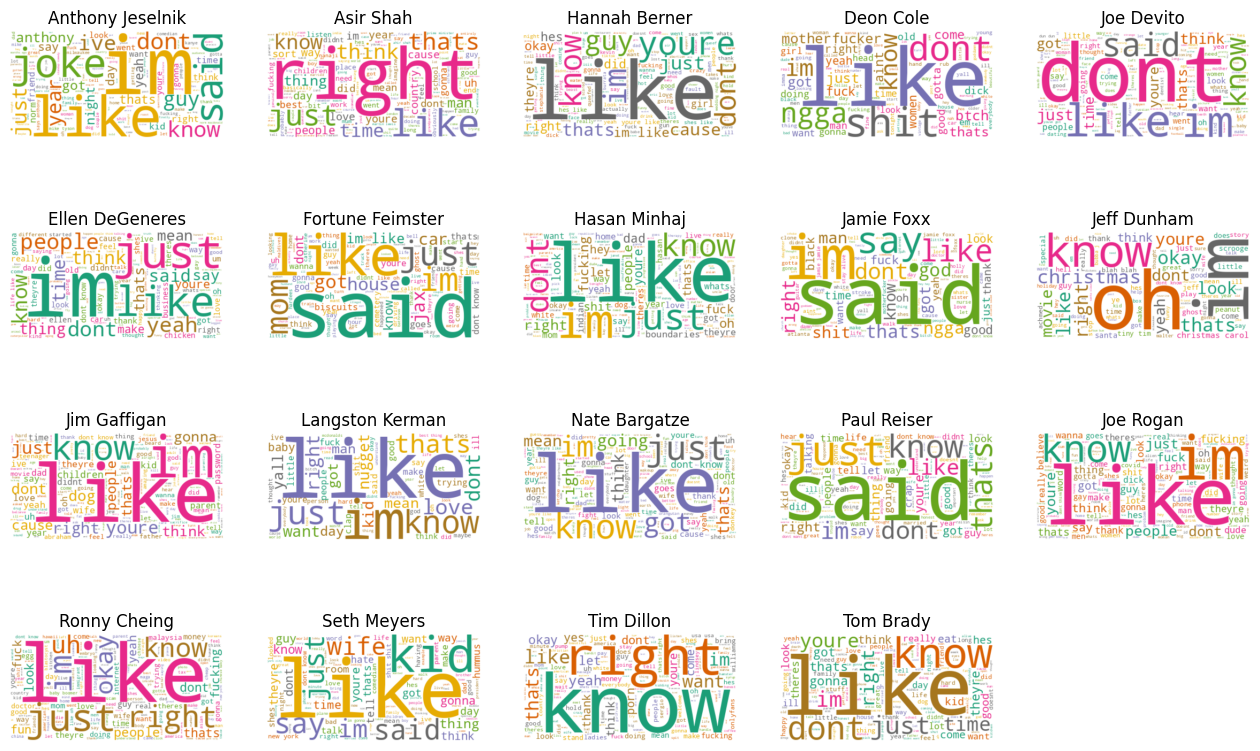

In [9]:
# Reset the output dimensions
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 10]

full_names = ['Anthony Jeselnik', 'Asir Shah', 'Hannah Berner', 'Deon Cole', 'Joe Devito', 'Ellen DeGeneres',
              'Fortune Feimster', 'Hasan Minhaj', 'Jamie Foxx', 'Jeff Dunham', 'Jim Gaffigan', 'Langston Kerman','Nate Bargatze', 'Paul Reiser', 'Joe Rogan', 'Ronny Cheing', 'Seth Meyers', 'Tim Dillon', 'Tom Brady']

# Create subplots for each comedian
for index, comedian in enumerate(data.columns):
    wc.generate(data_clean.transcript[comedian])

    plt.subplot(4, 5, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(full_names[index])

plt.show()

In [10]:
# Notice that words: 'said' and 'like' are very common in each comedians' wordcloud
# This is because of the counter not being able to split the words with 'like' resulting in different considerations of it.
from sklearn.feature_extraction.text import CountVectorizer
# Add new stop words manually (words with frequency>= 10)
stop_words = list(text.ENGLISH_STOP_WORDS) + add_stop_words + ['like', 'just', 'know', 'im', 'dont', 'right', 'thats']

# Recreate document-term matrix
cv = CountVectorizer(ngram_range=(1, 2), min_df=2, max_df=0.8, stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.transcript)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names_out())
data_stop.index = data_clean.index



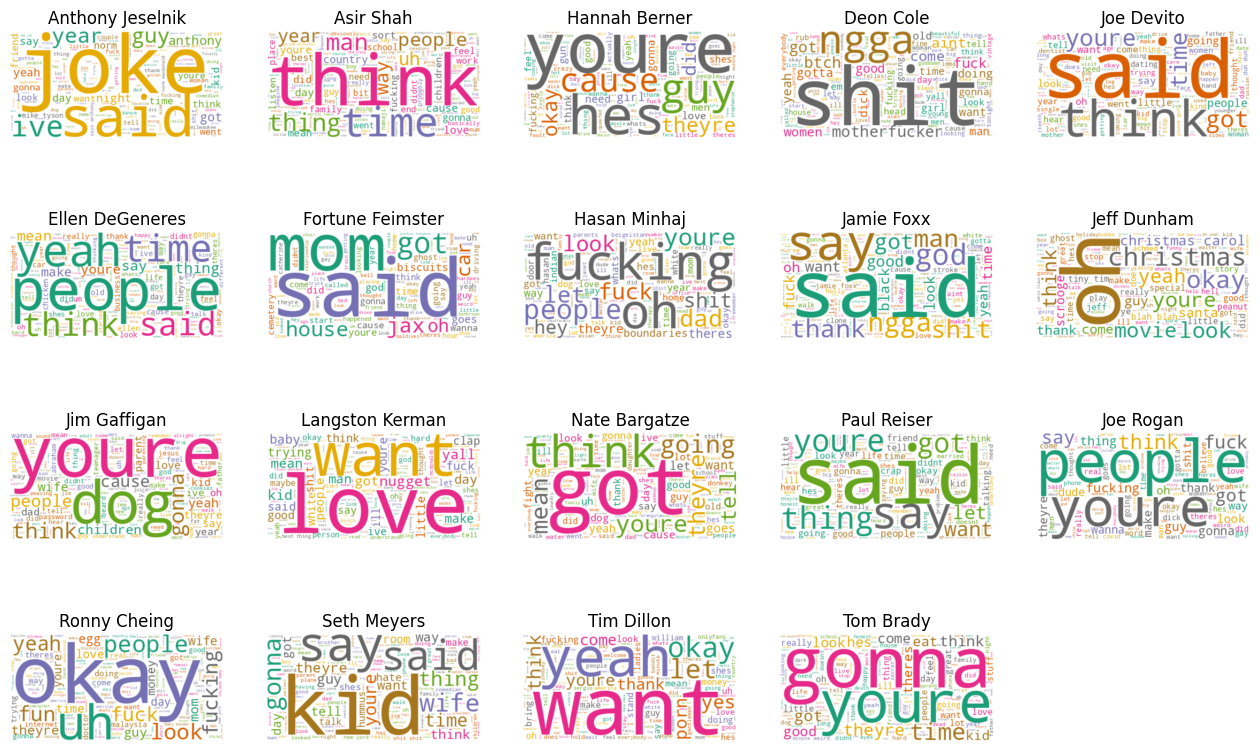

In [11]:
wc = WordCloud(stopwords=stop_words, # Custom stop words to exclude
               background_color="white", # White background
               colormap="Dark2", # Color scheme (Dark2 gives vibrant colors)
               max_font_size=150,  # Largest font size in the word cloud
               random_state=42)   # Ensures reproducibility

# Reset the output dimensions
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 10]

full_names = ['Anthony Jeselnik', 'Asir Shah', 'Hannah Berner', 'Deon Cole', 'Joe Devito', 'Ellen DeGeneres',
              'Fortune Feimster', 'Hasan Minhaj', 'Jamie Foxx', 'Jeff Dunham', 'Jim Gaffigan', 'Langston Kerman','Nate Bargatze', 'Paul Reiser', 'Joe Rogan', 'Ronny Cheing', 'Seth Meyers', 'Tim Dillon', 'Tom Brady']

# Create subplots for each comedian
for index, comedian in enumerate(data.columns):
    wc.generate(data_clean.transcript[comedian])

    plt.subplot(4, 5, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(full_names[index])

plt.show()

In [12]:
# # Pickle it for later use
# import pickle
# pickle.dump(cv, open("cv_stop.pkl", "wb"))
# data_stop.to_pickle("dtm_stop.pkl")

### Findings

* Deon Cole says the s-word and the n-word a lot. His comedy seems to be relaint on edgier humour.
* A lot of people use the F-word.
* While many of the word clouds contain common words like "think", "said," "people", some appear to have a more specific thematic focus, such as family, relationships, or societal commentary.


## Number of Words

### Analysis

In [13]:
# Find the number of unique words that each comedian uses

# Identify the non-zero items in the document-term matrix, meaning that the word occurs at least once
unique_list = []
for comedian in data.columns:
    uniques = data[comedian].to_numpy().nonzero()[0].size
    unique_list.append(uniques)

# Create a new dataframe that contains this unique word count
data_words = pd.DataFrame(list(zip(full_names, unique_list)), columns=['comedian', 'unique_words'])
data_unique_sort = data_words.sort_values(by='unique_words')
data_unique_sort

,comedian,unique_words
4,Joe Devito,986
0,Anthony Jeselnik,1079
8,Jamie Foxx,1111
9,Jeff Dunham,1113
3,Deon Cole,1135
17,Tim Dillon,1152
6,Fortune Feimster,1184
2,Hannah Berner,1215
12,Nate Bargatze,1265
11,Langston Kerman,1278


In [15]:
# Calculate the words per minute of each comedian

# Find the total number of words that a comedian uses
total_list = []
for comedian in data.columns:
    totals = sum(data[comedian])
    total_list.append(totals)

# Comedy special run times from IMDB, in minutes
run_times = [63, 68, 58, 59, 61, 47, 65, 63, 60, 62, 51, 70, 65, 61, 50, 79, 67, 50, 50]

# Let's add some columns to our dataframe
data_words['total_words'] = total_list
data_words['run_times'] = run_times
data_words['words_per_minute'] = data_words['total_words'] / data_words['run_times']
data_words['unique_words_per_minute'] = data_words['unique_words'] / data_words['run_times']

# Sort the dataframe by words per minute to see who talks the slowest and fastest
data_wpm_sort = data_words.sort_values(by='unique_words_per_minute')
data_wpm_sort



,comedian,unique_words,total_words,run_times,words_per_minute,unique_words_per_minute
4,Joe Devito,986,1326,61,21.737705,16.163934
0,Anthony Jeselnik,1079,1694,63,26.888889,17.126984
9,Jeff Dunham,1113,1968,62,31.741935,17.951613
6,Fortune Feimster,1184,1964,65,30.215385,18.215385
11,Langston Kerman,1278,2086,70,29.800000,18.257143
8,Jamie Foxx,1111,2393,60,39.883333,18.516667
3,Deon Cole,1135,2246,59,38.067797,19.237288
15,Ronny Cheing,1522,2708,79,34.278481,19.265823
12,Nate Bargatze,1265,2056,65,31.630769,19.461538
2,Hannah Berner,1215,1969,58,33.948276,20.948276


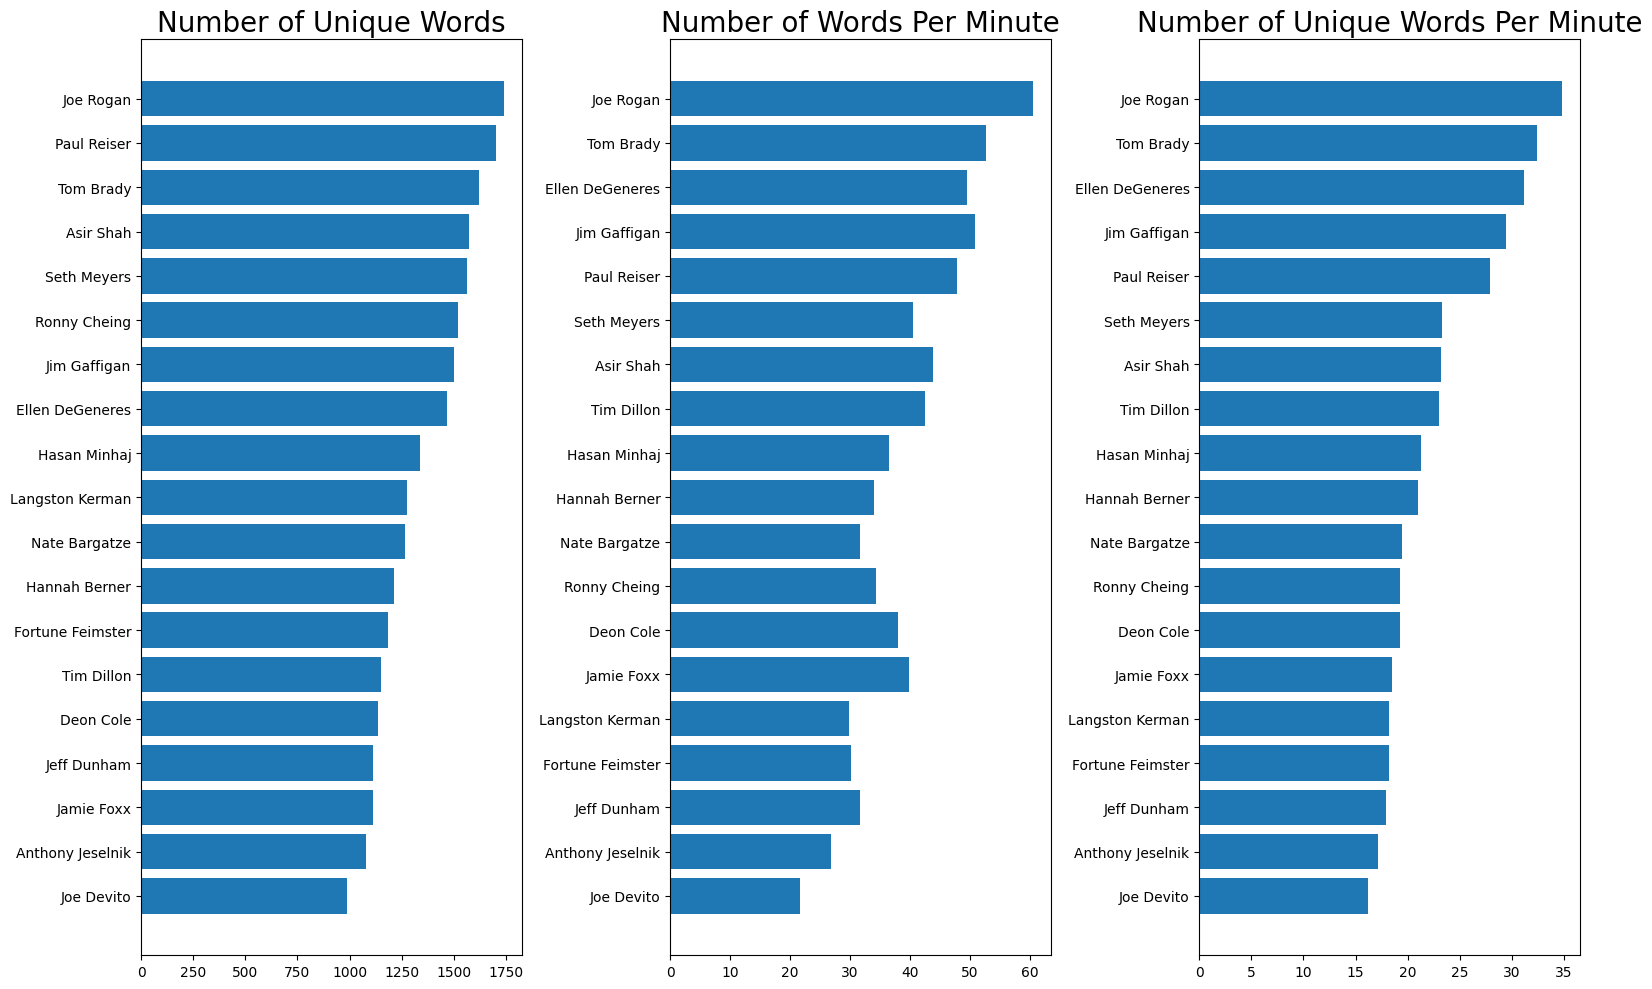

In [18]:
# Let's plot our findings
import numpy as np

y_pos = np.arange(len(data_words))

plt.subplot(1, 3, 1)
plt.barh(y_pos, data_unique_sort.unique_words, align='center')
plt.yticks(y_pos, data_unique_sort.comedian)
plt.title('Number of Unique Words', fontsize=20)

plt.subplot(1, 3, 2)
plt.barh(y_pos, data_wpm_sort.words_per_minute, align='center')
plt.yticks(y_pos, data_wpm_sort.comedian)
plt.title('Number of Words Per Minute', fontsize=20)

plt.subplot(1, 3, 3)
plt.barh(y_pos, data_wpm_sort.unique_words_per_minute, align='center')
plt.yticks(y_pos, data_wpm_sort.comedian)
plt.title('Number of Unique Words Per Minute', fontsize=20)

plt.tight_layout()
plt.show()
# make a plot of unique words per minute

### Findings

* **Vocabulary**
   * Joe Rogan, Paul Reiser and Tom Brady use a lot of words in their comedy
   * Joe Devito has a smaller vocabulary


* **Talking Speed**
   * Joe Rogan talks faster compared to the rest of the comedians. However the rate at which he uses the unique words is same as Tom Brady
   * Joe Devito and Anthony Jeselnik  talk slow

* **Findings**
  * Joe Devito speaks 20 words per min out of which 15 are unique. Due to slow speed he is understood well by the audience even if most of the times he uses a unique word.
  * On the other hand, Joe Rogan uses 60+ words per min and 35 of them are unique. This might make his comedy hard to be interpreted.
   
Rest of the comedians have a similar handle on the vocabulary and on their speed of speech.

## Amount of Profanity

### Analysis

In [20]:
#  Visiting profanity. Let's take a look at the most common words again.
Counter(words).most_common()

[('shit', 10),
 ('fuck', 9),
 ('fucking', 9),
 ('parents', 7),
 ('men', 7),
 ('remember', 6),
 ('mom', 6),
 ('dog', 5),
 ('school', 5),
 ('probably', 5),
 ('wanna', 5),
 ('theyre like', 5),
 ('everybody', 5),
 ('car', 5),
 ('looking', 5),
 ('white', 5),
 ('sex', 4),
 ('country', 4),
 ('father', 4),
 ('thank thank', 4),
 ('asked', 3),
 ('children', 3),
 ('just like', 3),
 ('youre like', 3),
 ('dick', 3),
 ('aint', 3),
 ('em', 3),
 ('yall', 3),
 ('goddamn', 3),
 ('age', 3),
 ('um', 3),
 ('gay', 3),
 ('honest', 3),
 ('special', 3),
 ('america', 3),
 ('die', 3),
 ('jokes', 2),
 ('couple', 2),
 ('milwaukee', 2),
 ('pregnant', 2),
 ('hate', 2),
 ('porn', 2),
 ('tonight', 2),
 ('place', 2),
 ('bit', 2),
 ('imagine', 2),
 ('indian', 2),
 ('married', 2),
 ('comedian', 2),
 ('hes like', 2),
 ('girls', 2),
 ('girl', 2),
 ('hot', 2),
 ('hold', 2),
 ('water', 2),
 ('know youre', 2),
 ('ngga', 2),
 ('motherfucker', 2),
 ('black', 2),
 ('like like', 2),
 ('imma', 2),
 ('youll', 2),
 ('running', 2),
 

In [21]:
# Let's isolate just these bad words
data_bad_words = data.transpose()[['fucking', 'fuck', 'shit', 'nggas', 'motherfucker','titties','dick', 'porn', 'sex', 'bitch']]
data_profanity = pd.concat([data_bad_words.fucking + data_bad_words.fuck,
                            data_bad_words.shit,
                            data_bad_words.nggas,
                            data_bad_words.motherfucker + data_bad_words.bitch,
                            data_bad_words.titties + data_bad_words.dick + data_bad_words.sex + data_bad_words.porn], axis=1)
data_profanity.columns = ['f_word', 's_word', 'n_word', 'offensive_words', 'strong_words']
data_profanity

,f_word,s_word,n_word,offensive_words,strong_words
anthony,18,10,0,1,12
asir,22,9,0,0,0
berner,28,6,0,3,24
cole,47,92,13,38,29
devito,0,0,0,0,0
ellen,1,0,0,0,1
fortune,7,2,0,2,0
hasan,68,27,0,7,3
jamie,36,44,8,19,4
jeff,0,0,0,3,0


In [22]:
# Calculate total bad words for each comedian
data_profanity['total_bad_words'] = data_profanity.sum(axis=1)

# Use the same run_times list as before (make sure it matches comedian order)
data_profanity['run_time'] = run_times  # Run time in minutes

# Calculate bad words per minute (BWPM)
data_profanity['bw_per_minute'] = data_profanity['total_bad_words'] / data_profanity['run_time']


In [23]:
# Sort by BWPM to see the most and least explicit comedians
data_bwpm_sort = data_profanity.sort_values(by='bw_per_minute', ascending=False)

# Display results
data_bwpm_sort[['total_bad_words', 'run_time', 'bw_per_minute']]

,total_bad_words,run_time,bw_per_minute
cole,219,59,3.711864
rogan,134,50,2.680000
tim,95,50,1.900000
jamie,111,60,1.850000
hasan,105,63,1.666667
berner,61,58,1.051724
kerman,73,70,1.042857
ronny,71,79,0.898734
anthony,41,63,0.650794
seth,31,67,0.462687


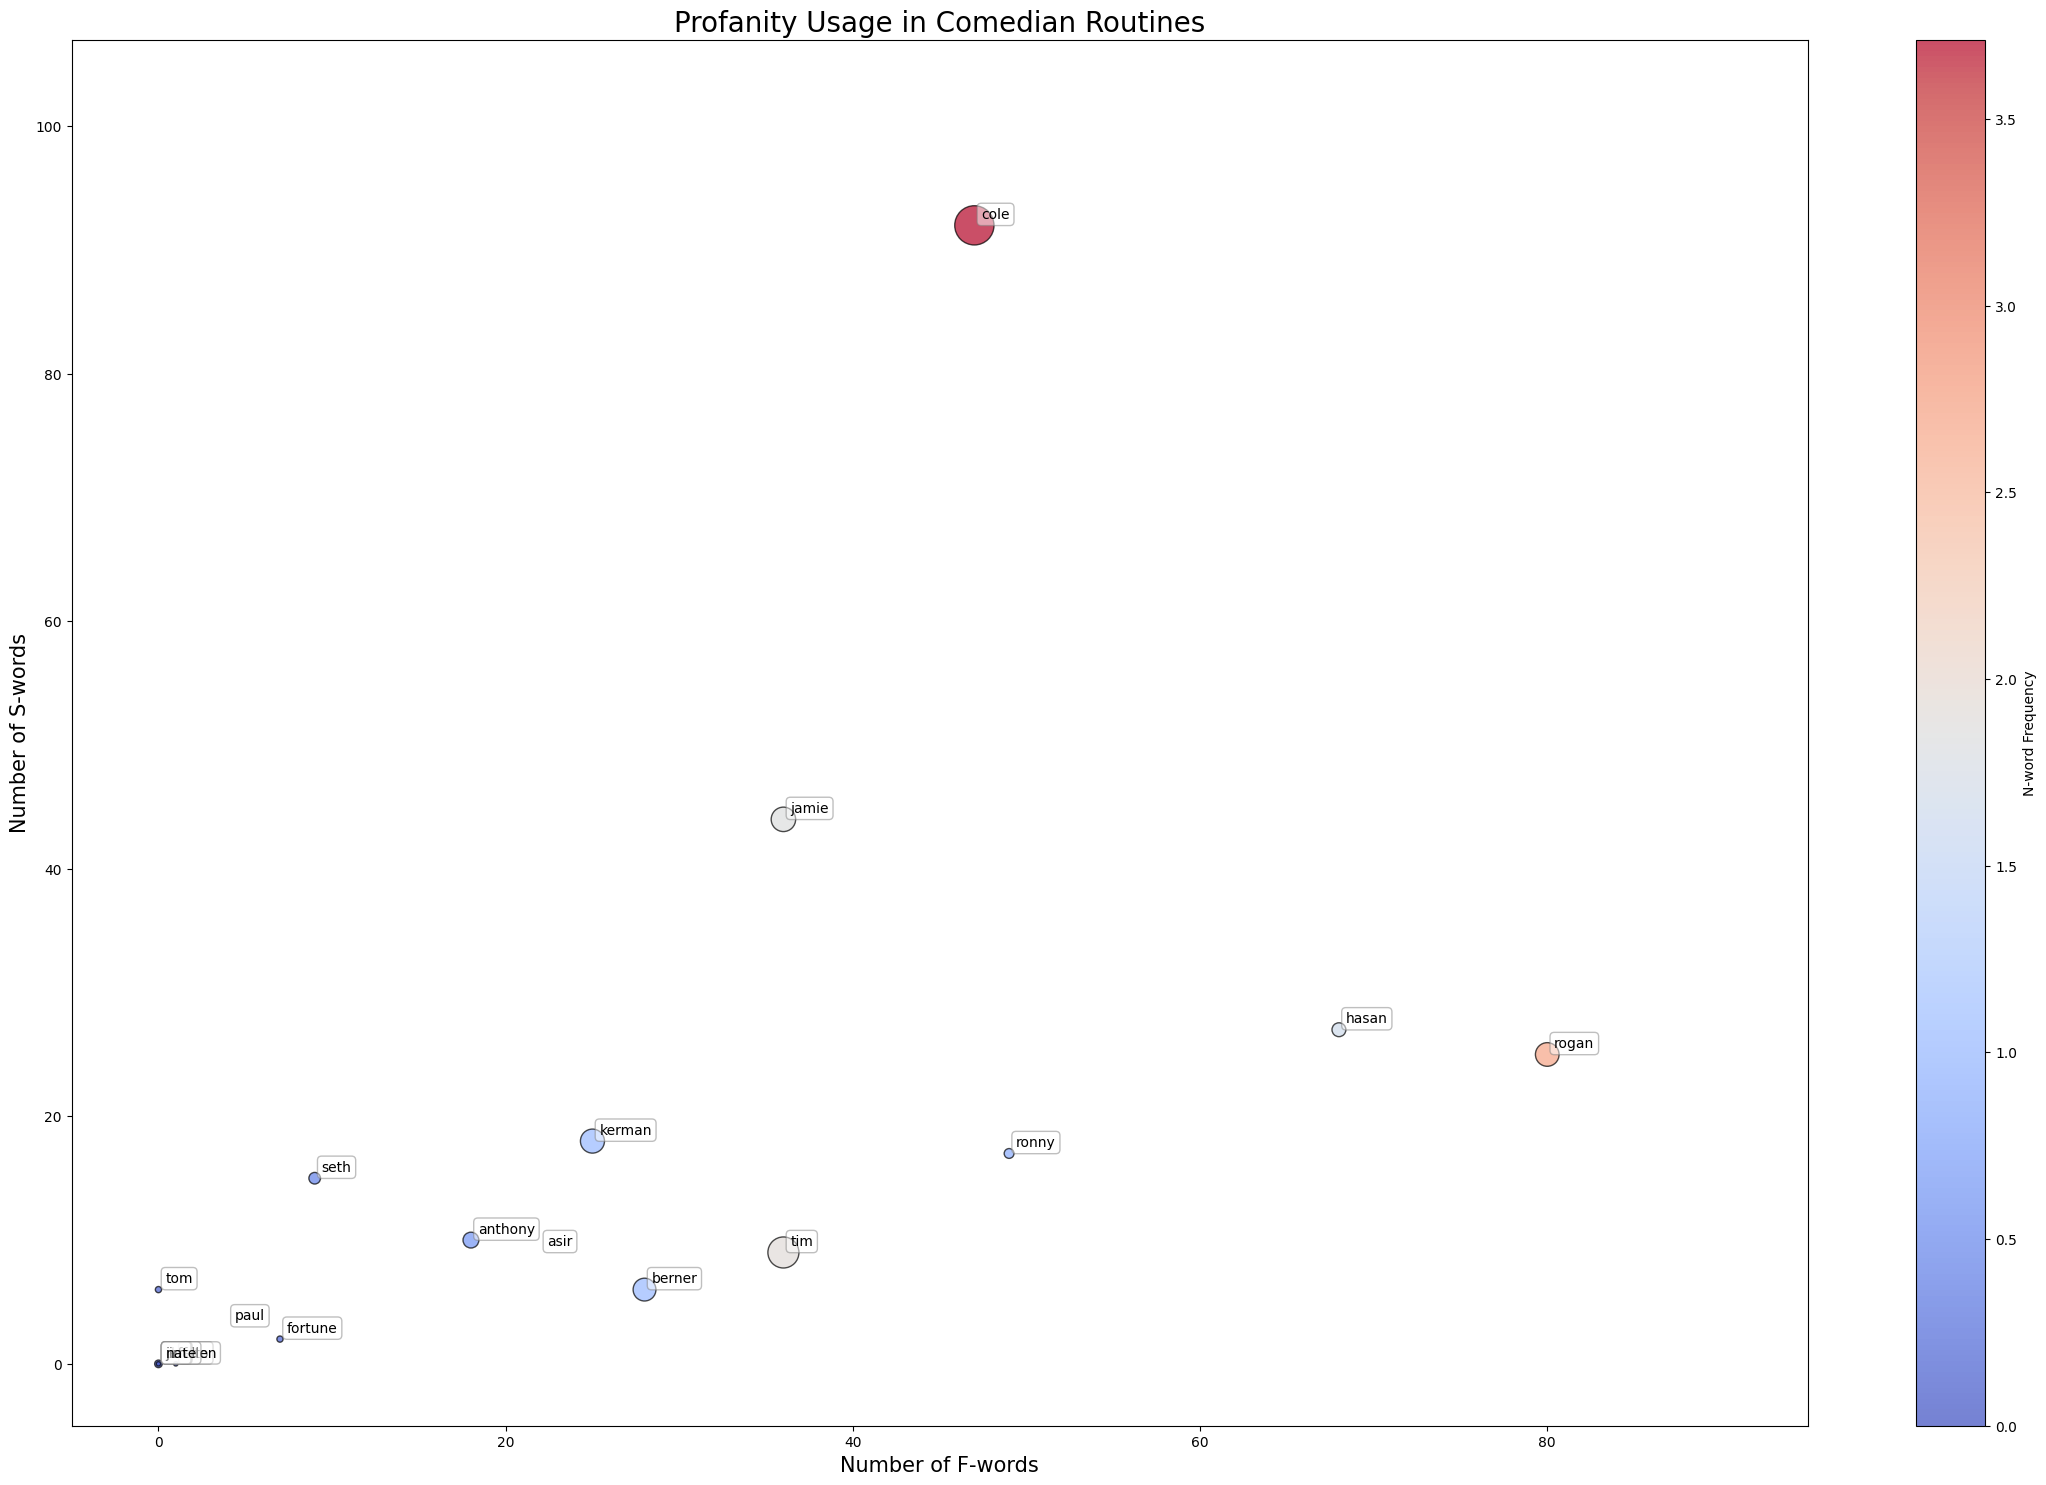

In [24]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [28, 18]  # Increase figure size

# Extract profanity counts
x = data_profanity['f_word']  # Number of F-words
y = data_profanity['s_word']  # Number of S-words
size = (data_profanity['offensive_words'] + data_profanity['strong_words'] + data_profanity['n_word']) * 10
colors = data_profanity['bw_per_minute']  # Color intensity based on the word per min

plt.scatter(x, y, s=size, c=colors, cmap='coolwarm', alpha=0.7, edgecolors='k')

# Add comedian names with better spacing
for i, comedian in enumerate(data_profanity.index):
    plt.annotate(comedian,
                 (x.iloc[i], y.iloc[i]),
                 textcoords="offset points",
                 xytext=(5,5),  # Adjust text position
                 ha='left',
                 fontsize=10,
                 bbox=dict(facecolor='white', alpha=0.5, edgecolor='gray', boxstyle='round,pad=0.3'))  # Add background

# Labels and Titles
plt.colorbar(label="N-word Frequency")
plt.title('Profanity Usage in Comedian Routines', fontsize=20)
plt.xlabel('Number of F-words', fontsize=15)
plt.ylabel('Number of S-words', fontsize=15)
plt.xlim(-5, max(x) + 15)  # Extend x-axis for readability
plt.ylim(-5, max(y) + 15)  # Extend y-axis for readability

plt.show()


### Findings

* **Averaging 3 F-Bombs Per Minute!** - I don't like too much swearing, especially the f-word, which is probably why I've never heard of Cole and Rogan
* **Clean Humor** - It looks like profanity might be a good predictor of the type of comedy I like. Besides Ellen, my two other favorite comedians in this group are Nate and Tom.
* Comedians like Tim and Jamie use bad words frequently, Tim prefers the f_word while Jamie goes with the s_word.

In [25]:
# Family-related words
data_family_words = data.transpose()[['parents', 'mom', 'father', 'children', 'son', 'daughter', 'sister', 'mother', 'brother']]
data_family = pd.concat([data_family_words.parents + data_family_words.mom + data_family_words.father,
                         data_family_words.children + data_family_words.son + data_family_words.daughter,
                         data_family_words.sister + data_family_words.mother + data_family_words.brother], axis=1)
data_family.columns = ['parent_references', 'child_references', 'sibling_references']
data_family

,parent_references,child_references,sibling_references
anthony,11,4,6
asir,9,23,9
berner,2,4,1
cole,0,0,7
devito,10,2,6
ellen,4,0,2
fortune,41,1,3
hasan,26,10,2
jamie,0,9,15
jeff,13,5,3


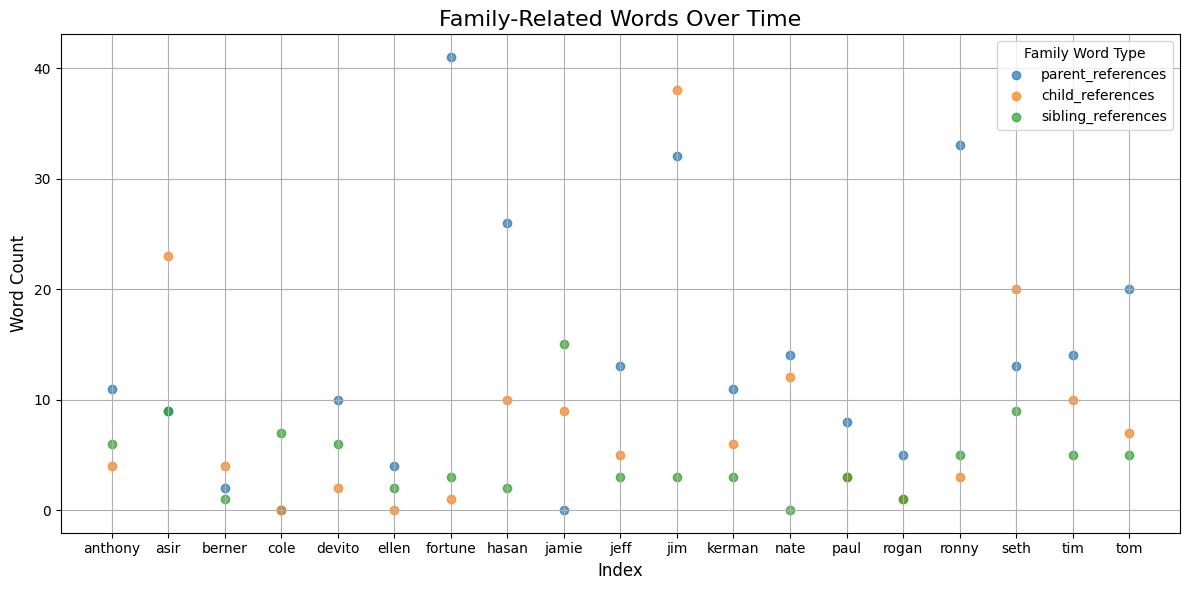

In [26]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming `data_family` has multiple columns related to family words and an index column (e.g., 'time' or numeric index)
columns_to_plot = [col for col in data_family.columns if col != 'time']  # Exclude 'time' if it exists

plt.figure(figsize=(12, 6))

# Scatter plot each family-related word type with a different color
for col in columns_to_plot:
    plt.scatter(data_family.index, data_family[col], label=col, alpha=0.7)

# Title and labels
plt.title('Family-Related Words Over Time', fontsize=16)
plt.xlabel('Time' if 'time' in data_family.columns else 'Index', fontsize=12)
plt.ylabel('Word Count', fontsize=12)

# Legend
plt.legend(title='Family Word Type')

# Show grid for better readability
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()


# Findings
- Fortune, Ronny and Tom uses the parent_references very often than the other. This might lead to 2 conclusions:  
  * either the comedian tries to connect with the audience on a more emotional level
  * or the comedian tries to combine the family words with provocative humour.

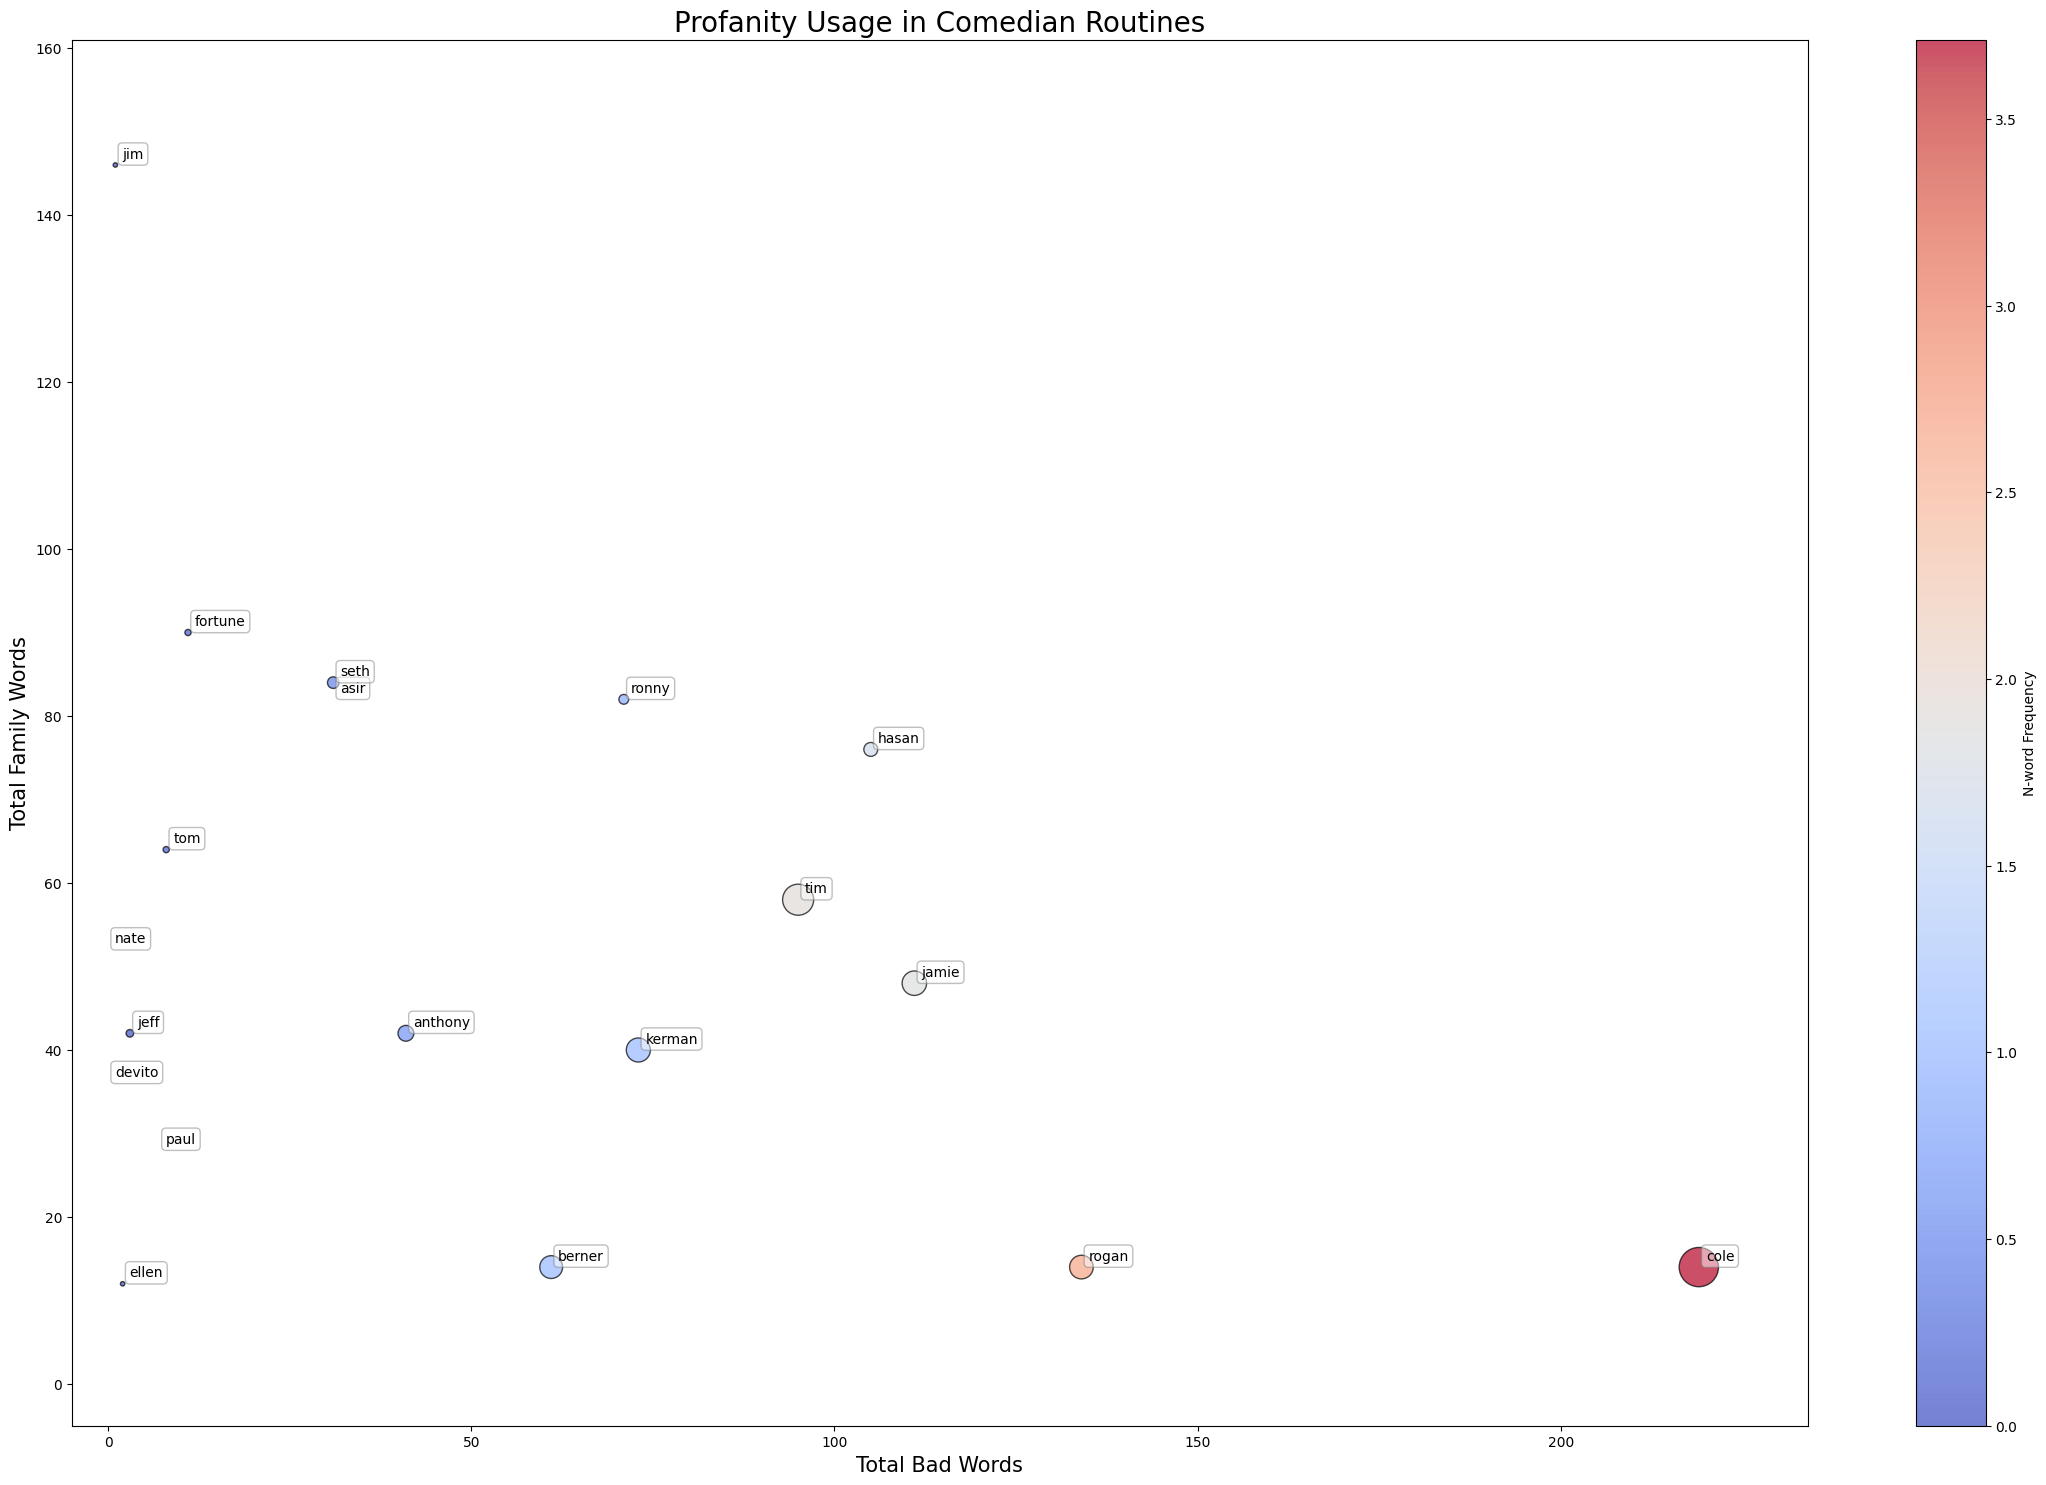

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [28, 18]  # Increase figure size
data_family['total_family_words'] = data_family.sum(axis=1)
# Extract profanity counts
x = data_profanity['total_bad_words']
y = data_family['total_family_words']
# size = (data_profanity['offensive_words'] + data_profanity['strong_words'] + data_profanity['n_word']) * 10
colors = data_profanity['bw_per_minute']  # Color intensity based on the word per min

plt.scatter(x, y, s=size, c=colors, cmap='coolwarm', alpha=0.7, edgecolors='k')

# Add comedian names with better spacing
for i, comedian in enumerate(data_profanity.index):
    plt.annotate(comedian,
                 (x.iloc[i], y.iloc[i]),
                 textcoords="offset points",
                 xytext=(5,5),  # Adjust text position
                 ha='left',
                 fontsize=10,
                 bbox=dict(facecolor='white', alpha=0.5, edgecolor='gray', boxstyle='round,pad=0.3'))  # Add background

# Labels and Titles
plt.colorbar(label="N-word Frequency")
plt.title('Profanity Usage in Comedian Routines', fontsize=20)
plt.xlabel('Total Bad Words', fontsize=15)
plt.ylabel('Total Family Words', fontsize=15)
plt.xlim(-5, max(x) + 15)  # Extend x-axis for readability
plt.ylim(-5, max(y) + 15)  # Extend y-axis for readability

plt.show()


# Overall Findings of bad words
- Comedians with Highest Profanity: The comedian with the highest profanity usage is "Cole" with over 200 total "bad words" in their routine.
- Comedians with Moderate Profanity: Several comedians, such as "Fortune", "Seth", and "Berner", fall in the middle range of profanity usage, with totals between 50 and 100 "bad words".
- Comedians with Lower Profanity: Some comedians, like "Ellen", "Nate", and "Paul", use relatively fewer "bad words" in their routines, with totals under 50.

# Findings about the proposed correaltion between family words and bad words

- Comedians like "Jamie" use high levels of both profanity and family-related language, while others like "Ellen" use relatively low amounts of both.
- The data could indicate that some comedians tend to incorporate more personal, family-oriented themes and references into their routines, while others may rely more on profanity and provocative language.
- However, this is might also propose an idea towards some comedians trying to incorporate family members in their provocative jokes.

In [31]:
# Sentiment-related words grouping
data_sentiment_words = data.transpose()[['loved',  'beloved', 'funny', 'amazing', 'special', 'favorite', 'welcome',  # positive
                                       'hate', 'stupid', 'scared', 'dead', 'hurt', 'die', 'kill']]  # negative

# Group into positive and negative sentiment
data_sentiment = pd.concat([
    # Positive sentiment words
    data_sentiment_words.loved + data_sentiment_words.beloved +
    data_sentiment_words.funny + data_sentiment_words.amazing +
    data_sentiment_words.special + data_sentiment_words.favorite +
    data_sentiment_words.welcome,

    # Negative sentiment words
    data_sentiment_words.hate + data_sentiment_words.stupid +
    data_sentiment_words.scared + data_sentiment_words.dead +
    data_sentiment_words.hurt + data_sentiment_words.die +
    data_sentiment_words.kill
], axis=1)

data_sentiment.columns = ['positive_sentiment', 'negative_sentiment']

# Calculate sentiment ratio (positive/negative)
data_sentiment['sentiment_ratio'] = data_sentiment.positive_sentiment / data_sentiment.negative_sentiment

# Calculate total sentiment words
data_sentiment['total_sentiment_words'] = data_sentiment.positive_sentiment + data_sentiment.negative_sentiment

data_sentiment

,positive_sentiment,negative_sentiment,sentiment_ratio,total_sentiment_words
anthony,11,11,1.000000,22
asir,20,7,2.857143,27
berner,9,21,0.428571,30
cole,1,7,0.142857,8
devito,2,5,0.400000,7
ellen,24,7,3.428571,31
fortune,1,5,0.200000,6
hasan,2,19,0.105263,21
jamie,19,10,1.900000,29
jeff,41,25,1.640000,66


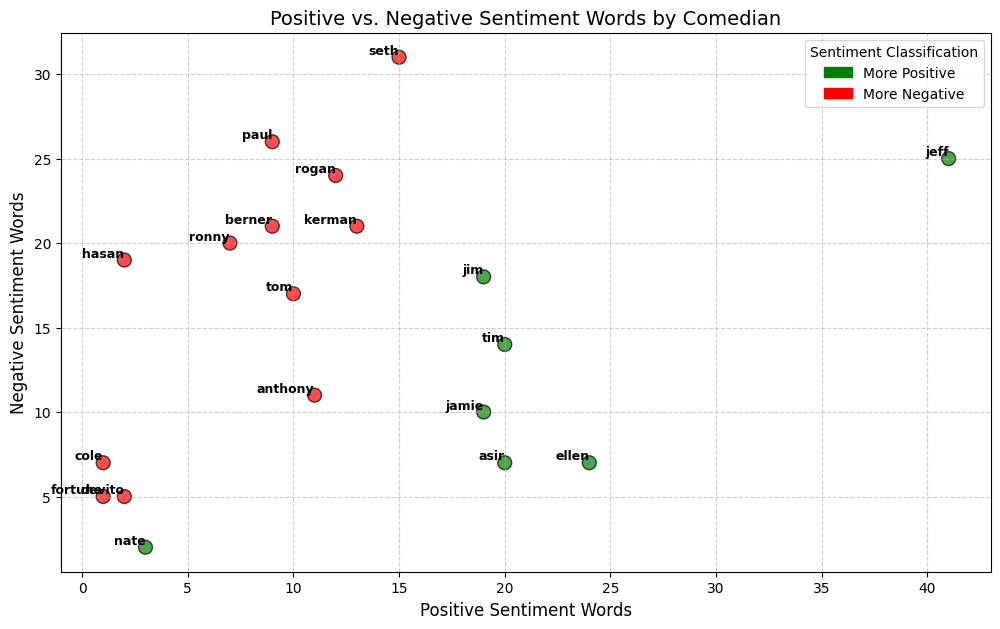

In [33]:
import matplotlib.pyplot as plt

# Define colors: green for more positive, red for more negative
colors = ['green' if pos > neg else 'red' for pos, neg in zip(data_sentiment.positive_sentiment, data_sentiment.negative_sentiment)]

plt.figure(figsize=(12, 7))

# Scatter plot
plt.scatter(data_sentiment.positive_sentiment, data_sentiment.negative_sentiment,
            c=colors, alpha=0.7, edgecolors='k', s=100)

# Add comedian names as labels
for comedian, pos, neg in zip(data_sentiment.index, data_sentiment.positive_sentiment, data_sentiment.negative_sentiment):
    plt.text(pos, neg, comedian, fontsize=9, ha='right', va='bottom', color='black', fontweight='bold')

# Labels and title
plt.xlabel('Positive Sentiment Words', fontsize=12)
plt.ylabel('Negative Sentiment Words', fontsize=12)
plt.title('Positive vs. Negative Sentiment Words by Comedian', fontsize=14)

# Legend
import matplotlib.patches as mpatches
legend_labels = [mpatches.Patch(color='green', label='More Positive'),
                 mpatches.Patch(color='red', label='More Negative')]
plt.legend(handles=legend_labels, title='Sentiment Classification')

# Show grid for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Display the plot
plt.show()


# Findings
- Comedians with red dots are the ones that focus on the negative sentiments while interacting with the audience
- The ones with green dots are the ones using positive sentiment to actually grow closer with the audience
- Jeff has used both the sentiments very frequently concluding his emotional behviour when performing on the stage
- Comedians like Nate prefer a different approach when performing, using only the jokes or formal language

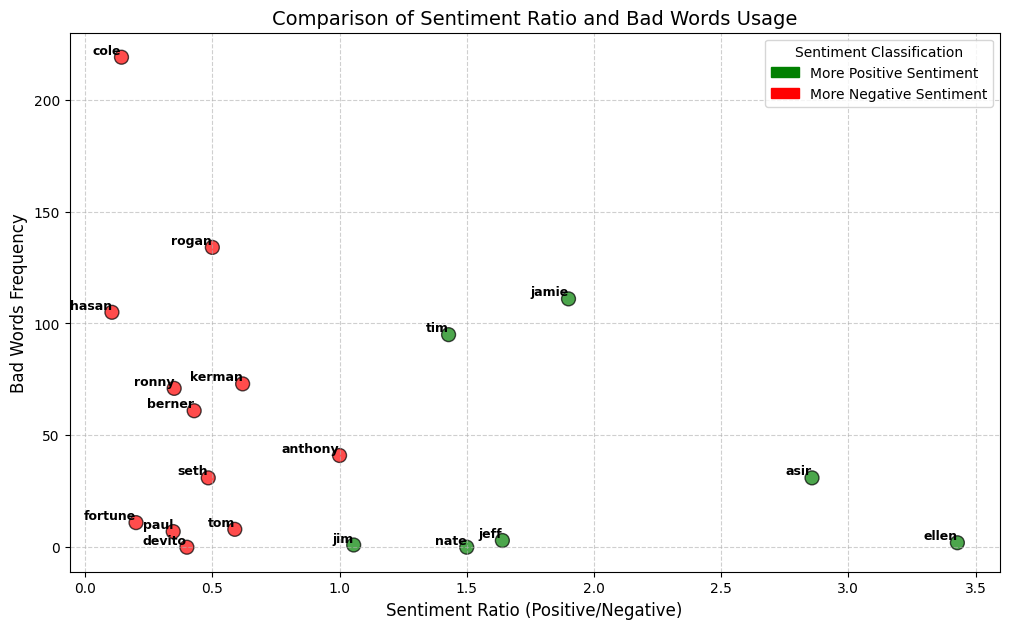

In [34]:
import matplotlib.pyplot as plt

# Assuming data_bwpm contains bad words per comedian
data_comparison = pd.DataFrame({
    'sentiment_ratio': data_sentiment['sentiment_ratio'],
    'bad_words': data_profanity['total_bad_words']
})

# Define colors: Green (positive sentiment), Red (negative sentiment)
colors = ['green' if ratio > 1 else 'red' for ratio in data_comparison.sentiment_ratio]

plt.figure(figsize=(12, 7))

# Scatter plot
plt.scatter(data_comparison.sentiment_ratio, data_comparison.bad_words,
            c=colors, alpha=0.7, edgecolors='k', s=100)

# Add comedian names as labels
for comedian, ratio, bad in zip(data_comparison.index, data_comparison.sentiment_ratio, data_comparison.bad_words):
    plt.text(ratio, bad, comedian, fontsize=9, ha='right', va='bottom', color='black', fontweight='bold')

# Labels and title
plt.xlabel('Sentiment Ratio (Positive/Negative)', fontsize=12)
plt.ylabel('Bad Words Frequency', fontsize=12)
plt.title('Comparison of Sentiment Ratio and Bad Words Usage', fontsize=14)

# Legend
import matplotlib.patches as mpatches
legend_labels = [mpatches.Patch(color='green', label='More Positive Sentiment'),
                 mpatches.Patch(color='red', label='More Negative Sentiment')]
plt.legend(handles=legend_labels, title='Sentiment Classification')

# Show grid for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Display the plot
plt.show()


# Comparison of Sentiments and Bad Words
- Higher Bad Word Usage → Lower Sentiment Ratio (More Negative Tone):
  Comedians like Cole, Rogan, Hasan
  Ronny, Kerman, Berner, and Anthony use a high frequency of bad words and have a low sentiment ratio (closer to 0). This suggests that their performances contain a more negative tone overall.

- More Positive Comedians Use Fewer Bad Words:
  Comedians like Ellen, Asir, and Jeff have a higher sentiment ratio (above 2.0) and use fewer bad words.
  This suggests that their content is more positive and family-friendly.   
  

## Side Note

What was our goal for the EDA portion of our journey? **To be able to take an initial look at our data and see if the results of some basic analysis made sense.**

My conclusion - yes, it does, for a first pass. There are definitely some things that could be better cleaned up, such as adding more stop words or including bi-grams. But we can save that for another day. The results, especially the profanity findings, are interesting and make general sense, so we're going to move on.

As a reminder, the data science process is an interative one. It's better to see some non-perfect but acceptable results to help you quickly decide whether your project is a dud or not, instead of having analysis paralysis and never delivering anything.

**Alice's data science (and life) motto: Let go of perfectionism!**

## Additional Exercises

1. What other word counts do you think would be interesting to compare instead of the f-word and s-word? Create a scatter plot comparing them.